In [ ]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Support Vector Machine (SVM) 분류 모델

## [P.1] Maximal margin SVM

iris 붓꽃 데이터를 활용해 SVM의 이미지 분류 모델을 만들어볼 것임

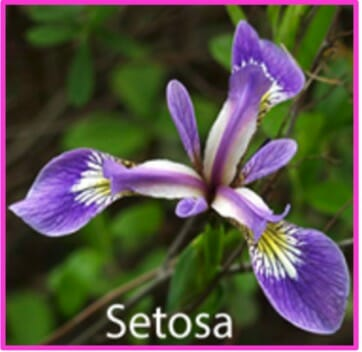

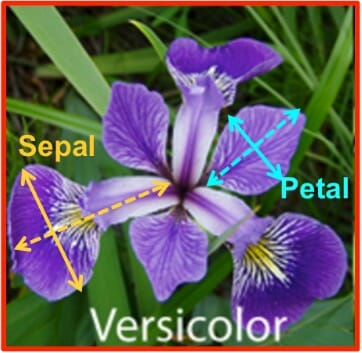

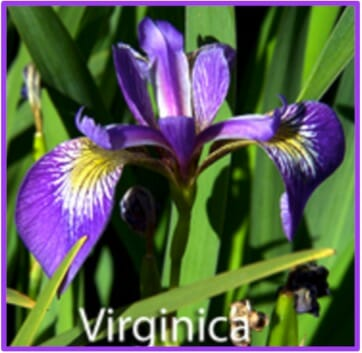

In [ ]:
from ??? import ???

iris = ???

# 0, 1 : sepal length, sepal width
X = iris["data"][:, (2, 3)]  # 2, 3 : petal length, petal width
y = iris["target"]

idx = (y == 0) + (y == 1)
X = X[idx]
y = y[idx]

위의 setosa 혹은 versicolor 품좀의 이진 클래스 분류를 위해, 데이터 중 `petal length`와 `petal width` 피처를 활용     
모델은 `sklearn`에서 제공하는 [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 클래스를 사용   
단, kernel 함수는 선형 함수인 SVM 모델로 사용할 것

In [ ]:
from ??? import ???

# SVM Classifier model
svm_clf = ???
svm_clf.???

In [ ]:
# trained parameters
print(svm_clf.???)
print(svm_clf.???)

In [ ]:
# support vector
print(svm_clf.???)

In [ ]:
def plot_decision_boundary(w, b, xmin, xmax):
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    x = np.linspace(xmin, xmax, 200)
    db = ???

    # w0*x0 + w1*x1 + b = 1
    # x1 = -w0/w1 * x0 - b/w1 + 1/w1
    margin = ???
    up = ???
    down = ???

    plt.plot(x, db, color='black')
    plt.plot(x, up, "--", color='black')
    plt.plot(x, down, "--", color='black')

In [ ]:
plt.figure(figsize=(6, 4))

w = svm_clf.???
b = svm_clf.???
    
plot_decision_boundary(w, b, 0, 5.5)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
plt.ylim(-1, 3)

plt.show()

## [P.2] Soft Margin SVM

In [ ]:
iris = ???

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)  # Iris-Virginica

`sklearn`에서는 [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)이란 클래스를 제공하며, 학습의 편이성을 매우 높여줌
해당 클래스는 다양한 하이퍼파라미터에 대해서 교차 검증을 진행할 때 필요한 여러 스텝을 묶어놓은 것으로 이해하면 됨   
필요한 argument는 학습에 사용될 모델과 데이터 전처리에 사용할 transforms가 있음

여기서는 [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 변환과 [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)(선형 커널 함수를 사용한 `SVC`와 동일하지만, 좀 더 다양한 손실 함수와 정규화를 사용할 수 있음) 모델을 사용

In [ ]:
from ??? import ???
from ??? import ???
from ??? import ???

In [ ]:
svm_clf = ???

svm_clf.???

하이퍼파라미터 `C`에 대해서 어떻게 동작하는지 확인하기

In [ ]:
scaler = ???
svm_clf1 = ??? # C 1
svm_clf2 = ??? # C 100

pip_svm_clf1 = ???
pip_svm_clf2 = ???

pip_svm_clf1.???
pip_svm_clf2.???

In [ ]:
# scaler
scaler.???, scaler.???

위에서 구한 파라미터 w와 b는 `StandardScaler`가 적용된 z에 대한 선형 함수 (y = w z + b) 인 상황임    

In [ ]:
# z = (x- m) /s
m = scaler.???
s = scaler.???

z0 = ???
z1 = ???

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf1.???
b = svm_clf1.???
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf2.???
b = svm_clf2.???
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

사이킷런의 SVM 모델은 `C` 하이퍼파라미터 값이 작아지면, 정규화의 강도가 더 세짐      
정규화 강도가 세진다는 말은 분산 오류가 줄어든다는 것이고, SVM에서 분산 오류를 줄어들게 하려면 마진의 폭이 커져야 함    
따라서 `C=1`일 때는 서포트 벡터의 수가 많고, 반대로 100의 값일 때는 수가 줄어든 모델이 학습됨

## [P.3] Non-linear SVM

비선형 데이터를 위해서 사이킷런의 [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 데이터셋 활용

In [ ]:
from ??? import ???

X, y = ??? # add noise
X.shape, y.shape

In [ ]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.xlabel("X1")
    plt.ylabel("X2")
    
plot_dataset(X, y)

모델로는 일전에 사용했던 `SVC` 클래스를 사용하지만, polynomial 커널 함수로 설정하기     
3차 커널 함수를 예시로 코드를 구현하고 학습시키기

In [ ]:
from ??? import ???

# coef0 argument controls how much the model is influenced by high-degree polynomials
poly3_svm_clf = ???
poly3_svm_clf.???

In [ ]:
poly10_svm_clf = ???
poly10_svm_clf.???

In [ ]:
def plot_predictions(clf):
    x0 = np.linspace(-3, 3, 100)
    x1 = np.linspace(-3, 3, 100)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.???
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1)

In [ ]:
plt.figure(figsize=(6, 4))

plot_predictions(poly3_svm_clf)
plot_dataset(X, y)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))

plot_predictions(poly10_svm_clf)
plot_dataset(X, y)
plt.show()

커널 함수가 좀더 비선형 함수가 되면서, 학습 데이터셋에 오버피팅 되는 경향을 볼 수 있음

이번에는 polynomial 커널 함수가 아닌, rbf 커널 함수를 사용해서 학습하기 

In [ ]:
rbf_svm_clf = ???
rbf_svm_clf.???

In [ ]:
plt.figure(figsize=(6, 4))

plot_predictions(rbf_svm_clf)
plot_dataset(X, y)
plt.show()